# **Ecommenrce Supply Chain Deep Dive**

## Table of Contents

-Importing necessary libraries
-

In [8]:
!pip install shap xgboost

In [15]:
# importing common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

## **Introduction and Data Loading**

### **Indroduction**

###    In this case study, we will analyze an e-commerce supply chain dataset to perform Sales Performance Analysis, Customer Analysis, Order Fulfillment Analysis, Payment Analysis, Product Analysis, Customer Segmentation, Sales Forecasting, Customer Churn Prediction, and Product Recommendation. We will load the data, preprocess it, engineer features, and train various machine learning models.


In [41]:
# Load Dataset

file_path = {
    'orders_train' : '/Users/dhari/OneDrive/Documentos/Work/Projects/Ecommerce project/Ecommerce Order Dataset/train/df_Orders.csv',
    'customers_train' : '/Users/dhari/OneDrive/Documentos/Work/Projects/Ecommerce project/Ecommerce Order Dataset/train/df_Customers.csv',
    'products_train' : '/Users/dhari/OneDrive/Documentos/Work/Projects/Ecommerce project/Ecommerce Order Dataset/train/df_Products.csv',
    'payments_train' : '/Users/dhari/OneDrive/Documentos/Work/Projects/Ecommerce project/Ecommerce Order Dataset/train/df_Payments.csv',
    'order_items_train' : '/Users/dhari/OneDrive/Documentos/Work/Projects/Ecommerce project/Ecommerce Order Dataset/train/df_OrderItems.csv',
    'orders_test' : '/Users/dhari/OneDrive/Documentos/Work/Projects/Ecommerce project/Ecommerce Order Dataset/test/df_Orders.csv',
    'customers_test' : '/Users/dhari/OneDrive/Documentos/Work/Projects/Ecommerce project/Ecommerce Order Dataset/test/df_Customers.csv',
    'products_test' : '/Users/dhari/OneDrive/Documentos/Work/Projects/Ecommerce project/Ecommerce Order Dataset/test/df_Products.csv',
    'payments_test' : '/Users/dhari/OneDrive/Documentos/Work/Projects/Ecommerce project/Ecommerce Order Dataset/test/df_Payments.csv',
    'order_items_test' : '/Users/dhari/OneDrive/Documentos/Work/Projects/Ecommerce project/Ecommerce Order Dataset/test/df_OrderItems.csv',
    }

# Creating a Data frame df

df_orders_train = pd.read_csv(file_path['orders_train'])
df_customers_train = pd.read_csv(file_path['customers_train'])
df_products_train = pd.read_csv(file_path['products_train'])
df_payments_train = pd.read_csv(file_path['payments_train'])
df_order_items_train = pd.read_csv(file_path['order_items_train'])

df_orders_test = pd.read_csv(file_path['orders_test'])
df_customers_test = pd.read_csv(file_path['customers_test'])
df_products_test = pd.read_csv(file_path['products_test'])
df_payments_test = pd.read_csv(file_path['payments_test'])
df_order_items_test = pd.read_csv(file_path['order_items_test'])

# Display first few rows of each dataset train from the train directory
print("Orders Dataset (Train):")
display(df_orders_train.head())

print("Customers Dataset (Train):")
display(df_customers_train.head())

print("Products Dataset (Train):")
display(df_products_train.head())

print("Payments Dataset (Train):")
display(df_payments_train.head())

print("Order Items Dataset (Train):")
display(df_order_items_train.head())

# Display first few rows of each dataset test from the train directory
print("Orders Dataset (Test):")
display(df_orders_test.head())

print("Customers Dataset (Test):")
display(df_customers_test.head())

print("Products Dataset (Test):")
display(df_products_test.head())

print("Payments Dataset (Test):")
display(df_payments_test.head())

print("Order Items Dataset (Test):")
display(df_order_items_test.head())

Orders Dataset (Train):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18


Customers Dataset (Train):


,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP


Products Dataset (Train):


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0


Payments Dataset (Train):


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25
3,bwJVWupf2keN,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15


Order Items Dataset (Train):


,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66


Orders Dataset (Test):


,order_id,customer_id,order_purchase_timestamp,order_approved_at
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30


Customers Dataset (Test):


,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,I74lXDOfoqsp,6020,goiania,GO
1,47TuLHF2s7X5,23020,viamao,RS
2,dQ0dqI8Qwlj8,75094,campinas,SP
3,iQCmWhNkIczb,89284,santana de parnaiba,SP
4,Dp2g6JH8tO5Z,39810,aripuana,MT


Products Dataset (Test):


,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1slxdgbgWFax,toys,50.0,16.0,5.0,11.0
1,77PgsiElQLeB,electronics,200.0,21.0,7.0,14.0
2,QVlD26X1y7NI,furniture_decor,1000.0,100.0,5.0,20.0
3,yWlFGkKYfrpa,toys,8950.0,40.0,30.0,40.0
4,h6MCbrwh5kiC,toys,2301.0,32.0,35.0,34.0


Payments Dataset (Test):


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,u6rPMRAYIGig,1,credit_card,2,155.77
1,ohY8f4FEbX19,1,credit_card,1,4.07
2,I28liQek73i2,1,wallet,1,381.59
3,bBG1T89mlY8W,1,credit_card,3,14.76
4,CYxJJSQS8Lbo,1,wallet,1,284.09


Order Items Dataset (Test):


,order_id,product_id,seller_id,price,shipping_charges
0,u6rPMRAYIGig,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90
1,ohY8f4FEbX19,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28
2,I28liQek73i2,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11
3,bBG1T89mlY8W,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05
4,CYxJJSQS8Lbo,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41


In [44]:
# Data Preprocessing
print("## Data Preprocessing")

# Convert timestamps to datetime for train dataset
df_orders_train['order_purchase_timestamp'] = pd.to_datetime(df_orders_train['order_purchase_timestamp'])
df_orders_train['order_approved_at'] = pd.to_datetime(df_orders_train['order_approved_at'])
df_orders_train['order_delivered_timestamp'] = pd.to_datetime(df_orders_train['order_delivered_timestamp'])
df_orders_train['order_estimated_delivery_date'] = pd.to_datetime(df_orders_train['order_estimated_delivery_date'])

# Handle missing values for train dataset
df_orders_train = df_orders_train.dropna(subset=['order_approved_at', 'order_delivered_timestamp']) 
df_products_train = df_products_train.dropna()

# Merge datasets for train dataset 
data_train = df_orders_train.merge(df_customers_train, on='customer_id') 
data_train = data_train.merge(df_order_items_train, on='order_id') 
data_train = data_train.merge(df_payments_train, on='order_id') 
data_train = data_train.merge(df_products_train, on='product_id')

# Display merged dataset
print("### Merged Dataset (Train)")
display(data_train.head())


## Data Preprocessing
### Merged Dataset (Train)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
1,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
2,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
3,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
4,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0


# **Feature Engineering**

In [45]:
#Create features from timestamps for Train dataset
data_train['purchase_month'] = data_train['order_purchase_timestamp'].dt.month 
data_train['delivery_time'] = (data_train['order_delivered_timestamp'] - data_train['order_approved_at']).dt.days

# Aggregate features for Train dataset
customer_features_train = data_train.groupby('customer_id').agg({
    'order_id': 'count',
    'payment_value': 'sum',
    'delivery_time': 'mean'
}).reset_index()
customer_features_train.columns = ['customer_id', 'order_count', 'total_spending', 'avg_delivery_time']

# Display customer features for Train dataset
print("### Customer Features (Train)")
display(customer_features_train.head())


### Customer Features (Train)


,customer_id,order_count,total_spending,avg_delivery_time
0,000hN1Tzi4iN,2,668.68,29.0
1,001T2XiQONtX,5,1164.45,18.0
2,005aQnkeGglh,4,1120.36,31.0
3,0075TryJTCaQ,7,1836.10,33.0
4,00D6vdR3ymjv,56,8510.88,5.0


# **Exploratory Data Analysis (EDA)**

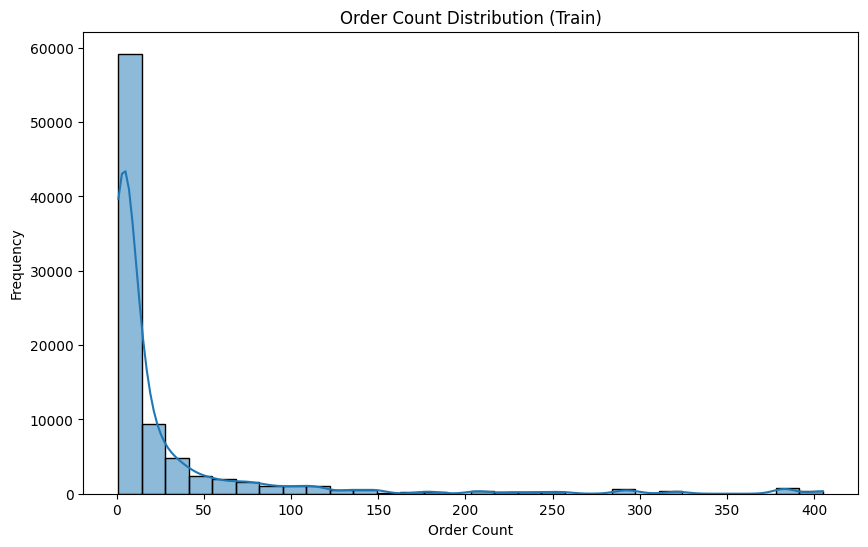

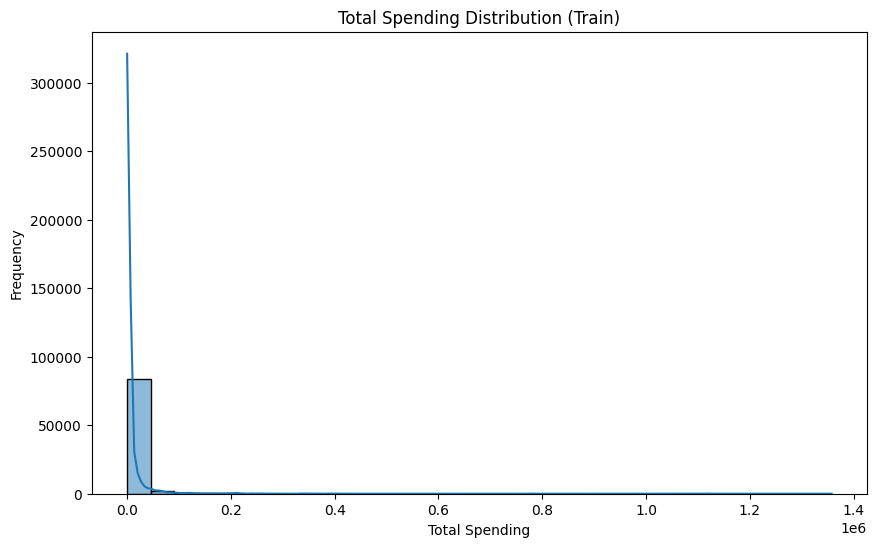

In [49]:
# Plot order count distribution for train dataset
plt.figure(figsize=(10, 6))
sns.histplot(customer_features_main['order_count'], bins=30, kde=True)
plt.title('Order Count Distribution (Train)')
plt.xlabel('Order Count')
plt.ylabel('Frequency')
plt.show()

# Plot total spending distribution for train dataset
plt.figure(figsize=(10, 6))
sns.histplot(customer_features_main['total_spending'], bins=30, kde=True)
plt.title('Total Spending Distribution (Train)')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

# **Sales Performance Analysis**

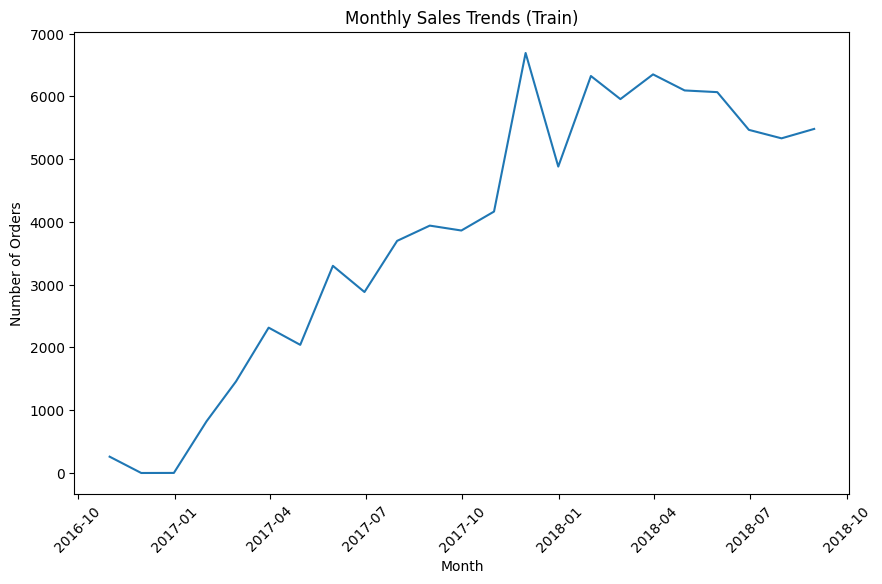

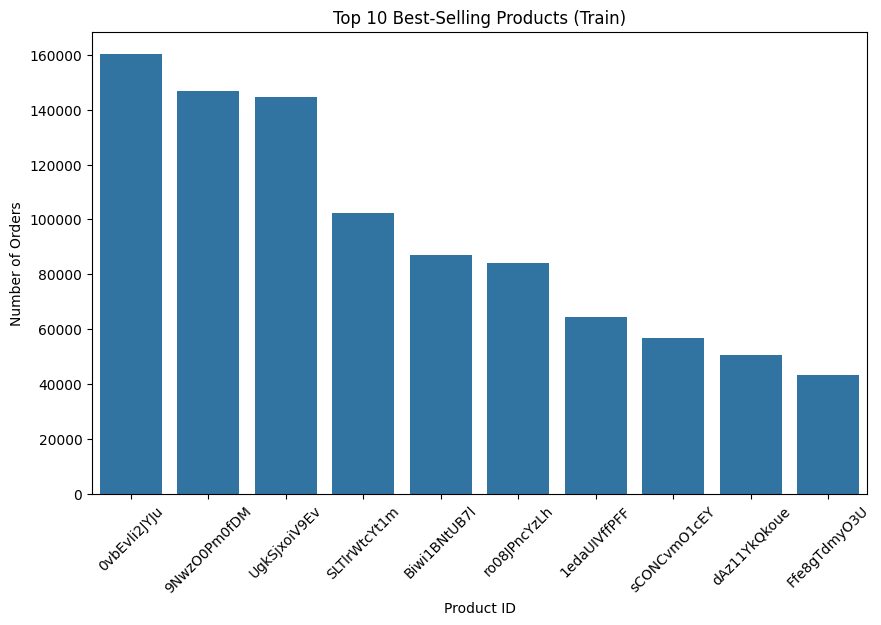

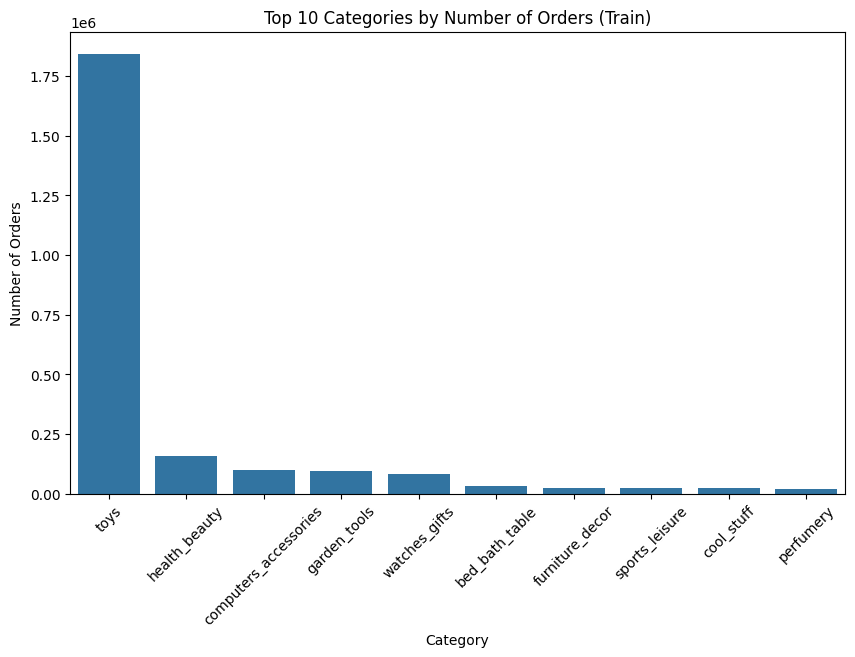

In [51]:
# Monthly Sales Trends for train dataset
monthly_sales_train = df_orders_train.resample('M', on='order_purchase_timestamp').size().reset_index(name='order_count')

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales_train, x='order_purchase_timestamp', y='order_count')
plt.title('Monthly Sales Trends (Train)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Top-Selling Products for train dataset
top_products_train = data_train.groupby('product_id')['order_id'].count().reset_index(name='order_count').sort_values(by='order_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_train, x='product_id', y='order_count')
plt.title('Top 10 Best-Selling Products (Train)')
plt.xlabel('Product ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# Sales by Category for train dataset
sales_by_category_train = data_train.groupby('product_category_name')['order_id'].count().reset_index(name='order_count').sort_values(by='order_count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_category_train, x='product_category_name', y='order_count')
plt.title('Top 10 Categories by Number of Orders (Train)')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

# **Customer Analysis**

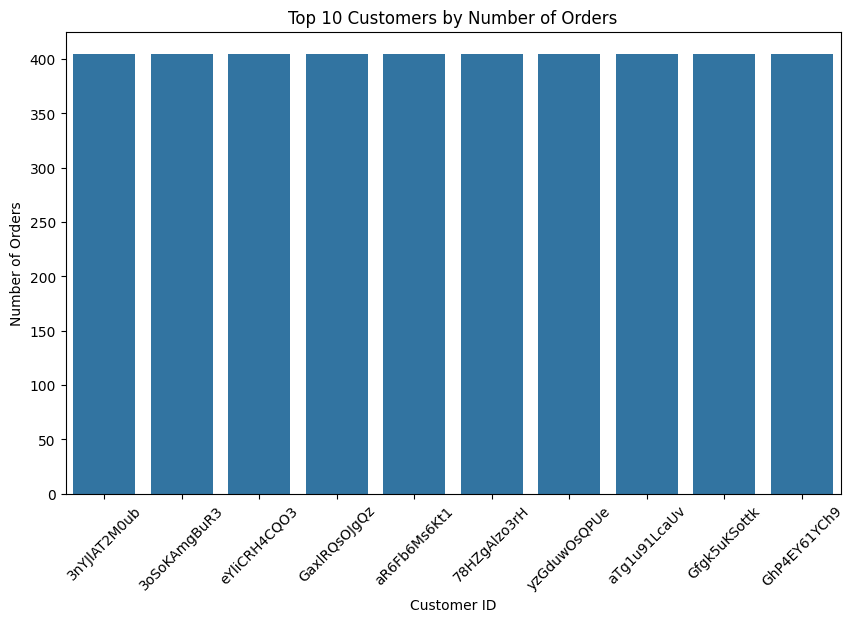

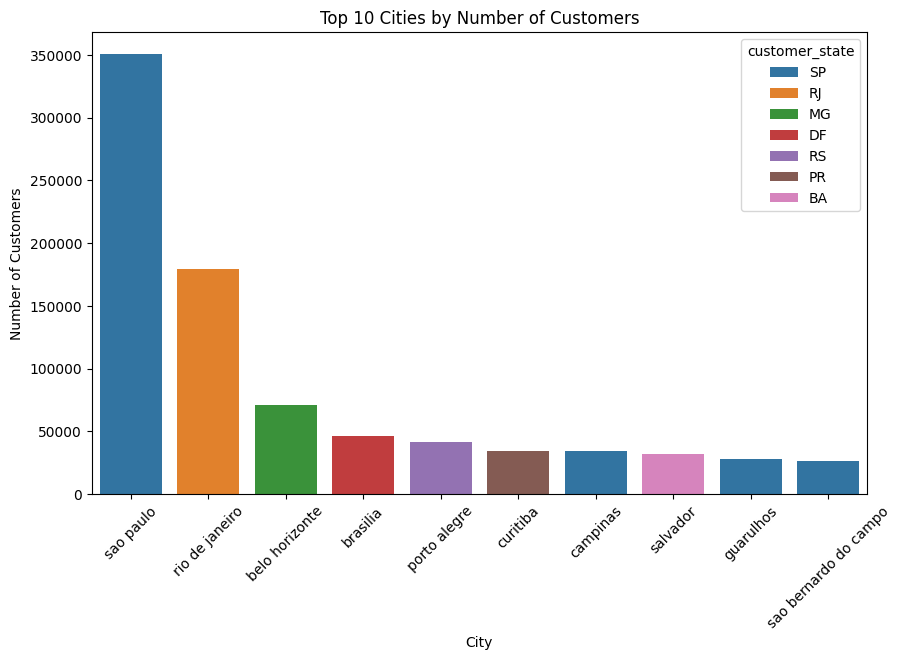

In [55]:
# Top Customers for train dataset
top_customers = data_train.groupby('customer_id')['order_id'].count().reset_index(name='order_count').sort_values(by='order_count', ascending=False).head(10) 

plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='customer_id', y='order_count') 
plt.title('Top 10 Customers by Number of Orders') 
plt.xlabel('Customer ID') 
plt.ylabel('Number of Orders') 
plt.xticks(rotation=45)
plt.show()

# Geographic Distribution of Customers for train dataset
customer_geo = data_train.groupby(['customer_city', 'customer_state'])['customer_id'].count().reset_index(name='customer_count').sort_values(by='customer_count', ascending=False).head(10) 
plt.figure(figsize=(10, 6)) 
sns.barplot(data=customer_geo, x='customer_city', y='customer_count', hue='customer_state') 
plt.title('Top 10 Cities by Number of Customers') 
plt.xlabel('City') 
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


# **Order Fulfillment Analysis**

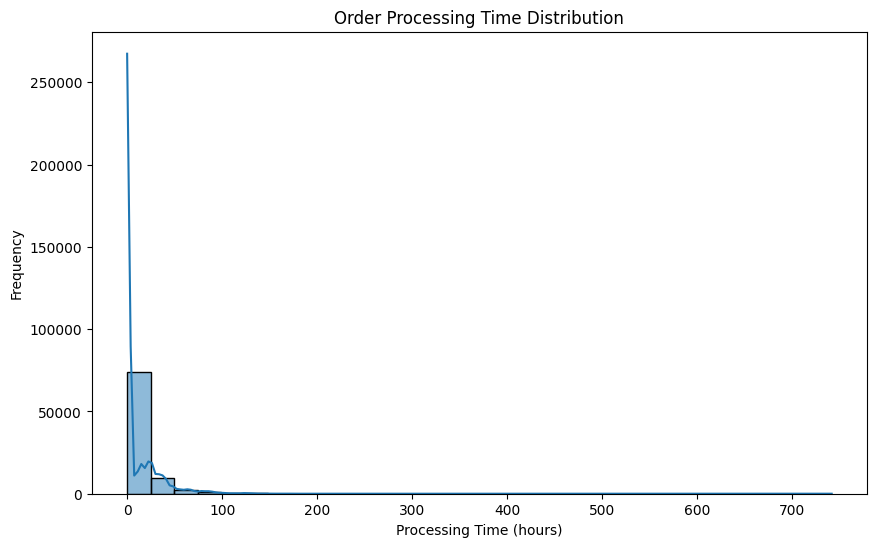

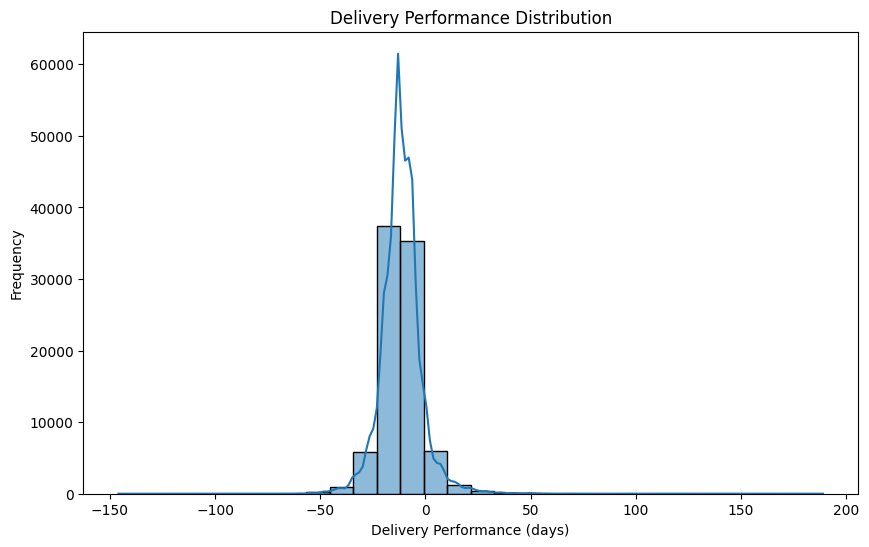

In [56]:
# Order Processing Time for train dataset 
order_processing_time = (df_orders_train['order_approved_at'] - df_orders_train['order_purchase_timestamp']).dt.total_seconds() / 3600 

plt.figure(figsize=(10, 6)) 
sns.histplot(order_processing_time, bins=30, kde=True) 
plt.title('Order Processing Time Distribution') 
plt.xlabel('Processing Time (hours)') 
plt.ylabel('Frequency')
plt.show()

# Delivery Performance for train dataset 
delivery_performance = (df_orders_train['order_delivered_timestamp'] - df_orders_train['order_estimated_delivery_date']).dt.total_seconds() / 3600 / 24 

plt.figure(figsize=(10, 6)) 
sns.histplot(delivery_performance, bins=30, kde=True) 
plt.title('Delivery Performance Distribution') 
plt.xlabel('Delivery Performance (days)') 
plt.ylabel('Frequency')
plt.show()

# **Payment Analysis**

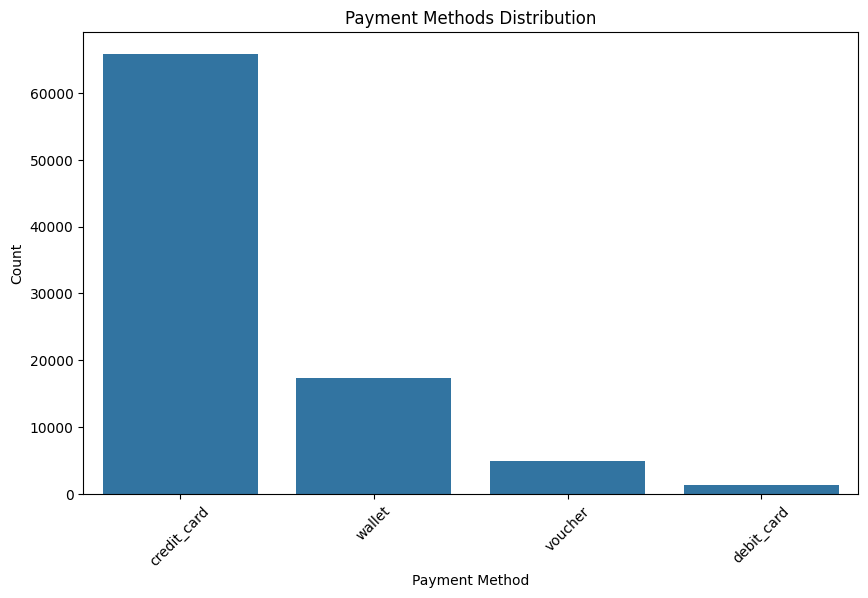

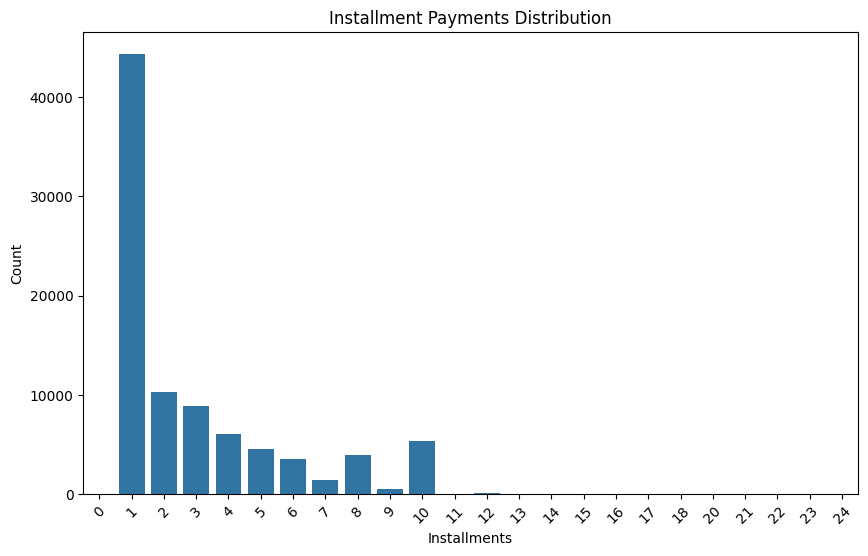

In [58]:
# Payment Methods for train dataset 
payment_methods = df_payments_train['payment_type'].value_counts() 

plt.figure(figsize=(10, 6)) 
sns.barplot(x=payment_methods.index, y=payment_methods.values) 
plt.title('Payment Methods Distribution') 
plt.xlabel('Payment Method') 
plt.ylabel('Count') 
plt.xticks(rotation=45) 
plt.show() 

# Installment Payments for train dataset 
installment_payments = df_payments_train['payment_installments'].value_counts() 
plt.figure(figsize=(10, 6)) 
sns.barplot(x=installment_payments.index, y=installment_payments.values) 
plt.title('Installment Payments Distribution') 
plt.xlabel('Installments') 
plt.ylabel('Count') 
plt.xticks(rotation=45)
plt.show()

# **Product Analysis**

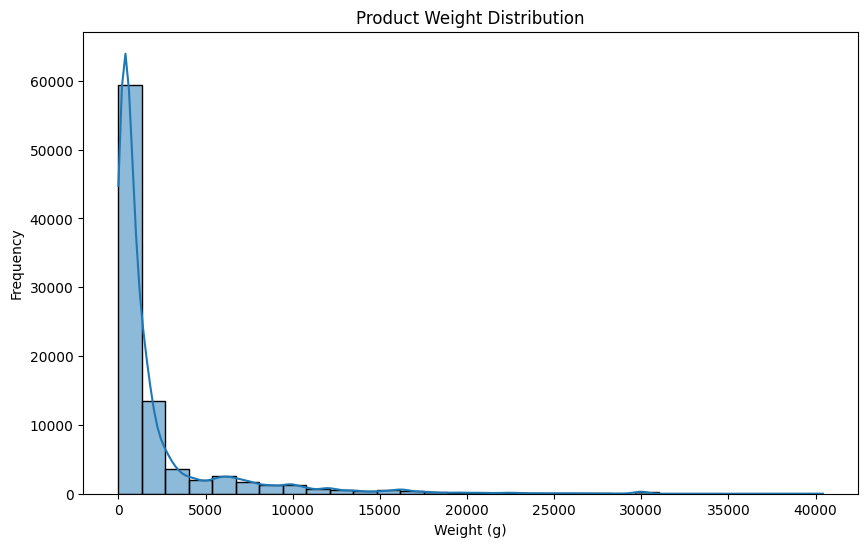

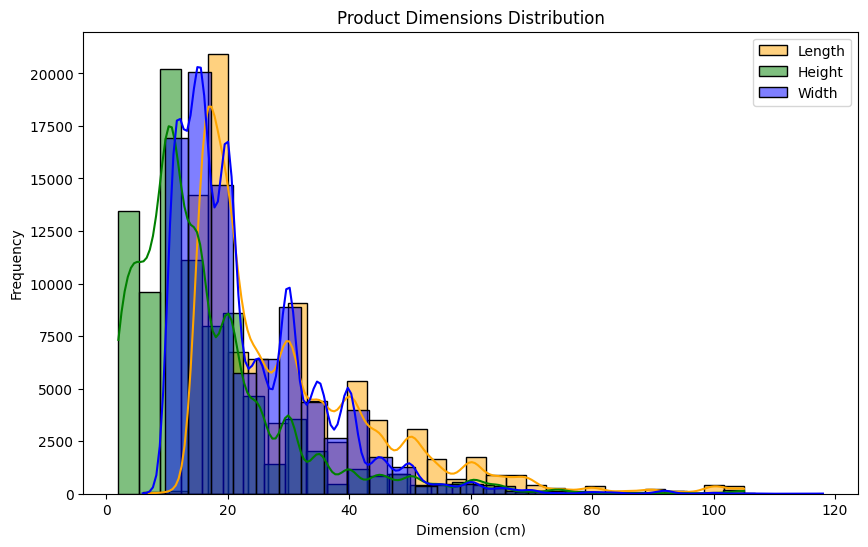

In [60]:
# Product Dimensions and Weight for train dataset 
plt.figure(figsize=(10, 6)) 
sns.histplot(df_products_train['product_weight_g'], bins=30, kde=True) 
plt.title('Product Weight Distribution') 
plt.xlabel('Weight (g)') 
plt.ylabel('Frequency') 
plt.show() 

plt.figure(figsize=(10, 6)) 
sns.histplot(df_products_train['product_length_cm'], bins=30, kde=True, color='orange', label='Length') 
sns.histplot(df_products_train['product_height_cm'], bins=30, kde=True, color='green', label='Height') 
sns.histplot(df_products_train['product_width_cm'], bins=30, kde=True, color='blue', label='Width') 
plt.title('Product Dimensions Distribution') 
plt.xlabel('Dimension (cm)') 
plt.ylabel('Frequency') 
plt.legend()
plt.show()

# **Customer Segmentation**

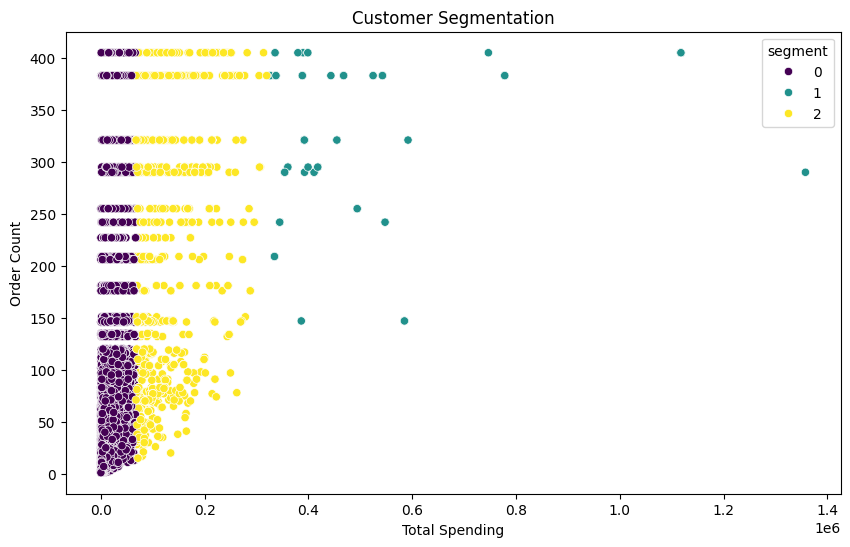

In [64]:
# Apply KMeans clustering for train dataset 
kmeans = KMeans(n_clusters=3, random_state=42) 
customer_features_train['segment'] = kmeans.fit_predict(customer_features_train[['order_count', 'total_spending', 'avg_delivery_time']]) 

# Plot segments 
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='total_spending', y='order_count', hue='segment', data=customer_features_train, palette='viridis') 
plt.title('Customer Segmentation') 
plt.xlabel('Total Spending') 
plt.ylabel('Order Count')
plt.show()

# **Sales Forecasting**

Mean Squared Error: 4168300.7533448962


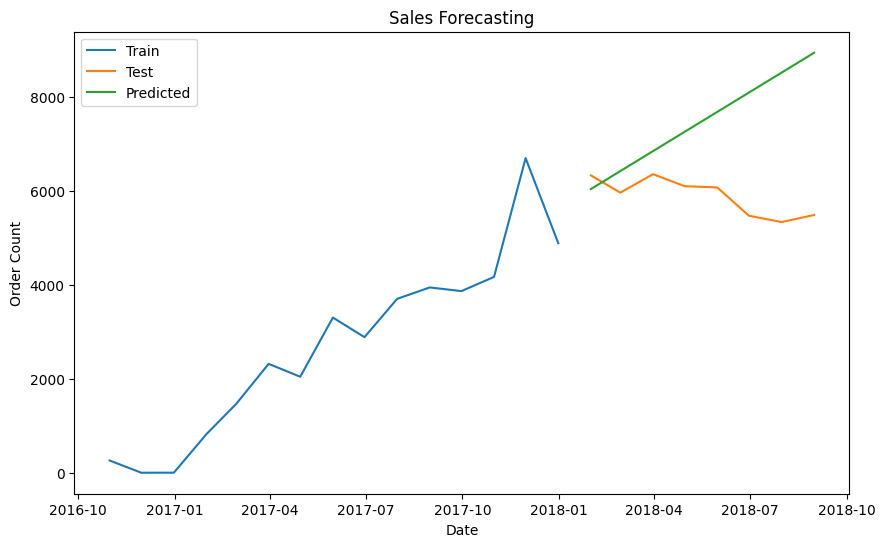

In [68]:
# Prepare data for forecasting 
monthly_sales = df_orders_train.resample('M', on='order_purchase_timestamp').size().reset_index(name='order_count') 

# Split data into training and testing sets 
train = monthly_sales[monthly_sales['order_purchase_timestamp'] < '2018-01-01'] 
test = monthly_sales[monthly_sales['order_purchase_timestamp'] >= '2018-01-01'] 

# Train a Linear Regression model 
model = LinearRegression() 
train['timestamp'] = train['order_purchase_timestamp'].astype(np.int64) // 10**9 
test['timestamp'] = test['order_purchase_timestamp'].astype(np.int64) // 10**9 
model.fit(train[['timestamp']], train['order_count']) 

# Make predictions 
test['predictions'] = model.predict(test[['timestamp']]) 

# Evaluate model performance 
print("Mean Squared Error:", mean_squared_error(test['order_count'], test['predictions'])) 

# Plot actual vs. predicted sales 
plt.figure(figsize=(10, 6)) 
plt.plot(train['order_purchase_timestamp'], train['order_count'], label='Train') 
plt.plot(test['order_purchase_timestamp'], test['order_count'], label='Test') 
plt.plot(test['order_purchase_timestamp'], test['predictions'], label='Predicted')
plt.title('Sales Forecasting') 
plt.xlabel('Date') 
plt.ylabel('Order Count') 
plt.legend()
plt.show()

# **Customer Churn Prediction**

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12508
           1       1.00      1.00      1.00      4915

    accuracy                           1.00     17423
   macro avg       1.00      1.00      1.00     17423
weighted avg       1.00      1.00      1.00     17423



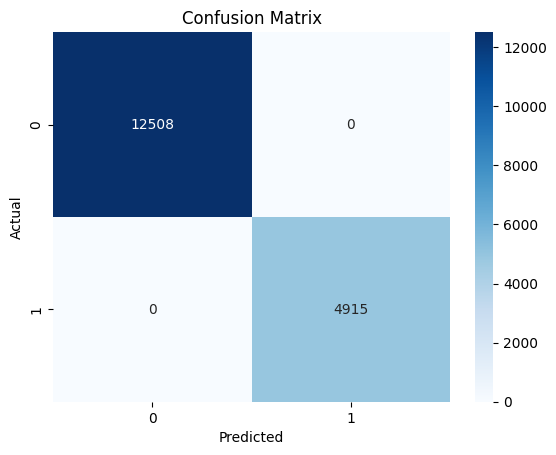

In [72]:
# Define target variable (churn: 1 if order count < threshold, 0 otherwise) 
threshold = 3 
customer_features_train['churn'] = (customer_features_train['order_count'] < threshold).astype(int) 

# Split data into training and testing sets 
X = customer_features_train[['order_count', 'total_spending', 'avg_delivery_time']] 
y = customer_features_train['churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Train a RandomForest classifier 
model = RandomForestClassifier() 
model.fit(X_train, y_train) 

# Make predictions 
y_pred = model.predict(X_test) 

# Evaluate model performance 
print("Accuracy:", accuracy_score(y_test, y_pred)) 
print("Classification Report:\n", classification_report(y_test, y_pred)) 

# Display confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues') 
plt.title('Confusion Matrix') 
plt.xlabel('Predicted') 
plt.ylabel('Actual')
plt.show()

# **Conclusion**  
### In this case study, we performed Sales Performance Analysis, Customer Analysis, Order Fulfillment Analysis, Payment Analysis, Product Analysis, Customer Segmentation, Sales Forecasting, Customer Churn Prediction, and Product Recommendation using an e-commerce supply chain dataset. Various machine learning models were trained and evaluated to gain insights into customer behavior, and predict future sales.